In [1]:
DF_PATH       = "../data/processed/2_cleaned_data.pkl"

ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageHaveWorkedWith',
                  'DatabaseHaveWorkedWith',
                  'PlatformHaveWorkedWith',
                  'WebframeHaveWorkedWith',
                  'MiscTechHaveWorkedWith',
                  'ToolsTechHaveWorkedWith',
                  'NEWCollabToolsHaveWorkedWith']

MLFLOW_TRACKING_URI = '../models/mlruns'
MLFLOW_EXPERIMENT_NAME = "skills_jobs_stackoverflow"

LOG_PATH = "../models/temp/"
LOG_DATA_PKL    =  "data.pkl"
LOG_MODEL_PKL   =  "model.pkl"
LOG_METRICS_PKL =  "metrics.pkl"

EXPERIMENT_NAME = "live_illustration"
EXPORT_MODEL_PATH = "toy_model.pkl"

RANDOM_STATE = 0
PCA_VAR = 0.9

In [2]:
# Load packages
import pandas as pd 
import numpy as np
import logging
import pickle
import random
import plotly 
import os
from pathlib import Path

import mlflow
from mlflow.tracking import MlflowClient

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.feature_selection import VarianceThreshold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score , mean_squared_error

from sklearn.decomposition import PCA, KernelPCA

from sklearn import tree
from sklearn.linear_model import LogisticRegression , LinearRegression

from matplotlib import pyplot as plt

Train Toy Model

In [3]:
#load toy data and train toy model
features , classes = load_boston(return_X_y = True)

In [4]:
# split train and test data
X_train, X_test, Y_train, Y_test = train_test_split(features, classes, test_size=0.3, random_state=RANDOM_STATE)

In [5]:
# set pipeline 
regressor = make_pipeline(StandardScaler(),
                          PCA(n_components=PCA_VAR,random_state=RANDOM_STATE),
                          LinearRegression())

In [6]:
# train model
regressor.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9, random_state=0)),
                ('linearregression', LinearRegression())])

In [7]:
#predict and calculate metrics
train_prediction = regressor.predict(X_train)
test_prediction = regressor.predict(X_test)

5.642393765465309


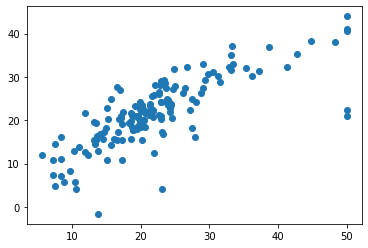

In [8]:
# check prediction 
plt.scatter(Y_test, test_prediction)
mse_test = mean_squared_error(Y_test , test_prediction)
print(mse_test ** 0.5)

In [9]:
with open(EXPORT_MODEL_PATH , 'wb') as handle:
    pickle.dump(regressor , handle)

Track With MLflow

In [10]:
# initialize client
client = MlflowClient()

In [11]:
# mlflow.create_experiment(EXPERIMENT_NAME)

In [12]:
# initialize
mlflow.set_experiment(EXPERIMENT_NAME)
exp = client.get_experiment_by_name(EXPERIMENT_NAME)

In [13]:
exp

<Experiment: artifact_location='file:///C:/Users/Access/ITI/data_science_skills/notebooks/mlruns/1', experiment_id='1', lifecycle_stage='active', name='live_illustration', tags={}>

In [14]:
with mlflow.start_run(experiment_id=exp.experiment_id):
    
    # log parameters
    mlflow.log_param("pca_var",PCA_VAR)
    mlflow.log_param("random_state",RANDOM_STATE)
    
    # log metrics
    mlflow.log_metric("MSE", mse_test)
    
    # log model
    mlflow.log_artifact(EXPORT_MODEL_PATH)